In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
from matplotlib import pyplot as plt
import pathlib
import glob 
import warnings
warnings.filterwarnings("ignore")

data_dir = 'C:\\Users\\jaydip sanyal\\Desktop\\Mango_Leaf_Disease\\MangoLeafBD Dataset\\train'

In [2]:
IMAGE_SIZE = 224
BATCH_SIZE = 32
CHANNELS = 3
EPOCH = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 4000 files belonging to 8 classes.


In [4]:
class_names = dataset.class_names
class_names

['Anthracnose',
 'Bacterial Canker',
 'Cutting Weevil',
 'Die Back',
 'Gall Midge',
 'Healthy',
 'Powdery Mildew',
 'Sooty Mould']

In [5]:
len(dataset)

125

(32, 224, 224, 3)
[1 2 2 6 0 7 5 1 5 3 0 5 6 5 2 0 5 2 2 0 7 0 1 2 7 6 4 2 2 2 3 1]


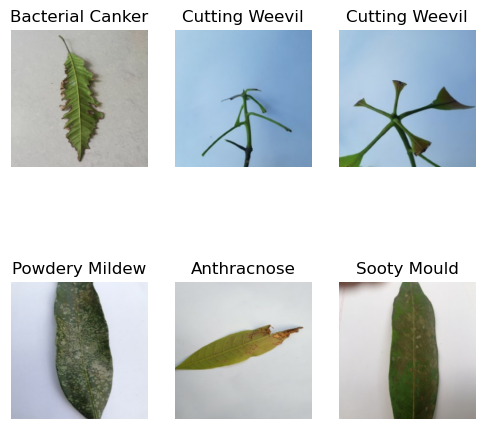

In [6]:
plt.figure(figsize=(6,6))
for img_batch, label_batch in dataset.take(1):
    print(img_batch.shape)
    print(label_batch.numpy())
    for i in range(6):
        ax = plt.subplot(2,3,i+1)
        plt.imshow(img_batch[i].numpy().astype('uint8'))
        plt.axis('off')
        plt.title(class_names[label_batch[i]])

In [7]:
def get_tf_dataset_partitions(ds, train_split=0.8, vald_split=0.1, test_split=0.1, shuffle= True, shuffle_size=2000):
    
    dataset_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=20)
    
    train_size = int(train_split * dataset_size)
    vald_size = int(vald_split * dataset_size)
    
    train_ds = ds.take(train_size)
    vald_ds = ds.skip(train_size).take(vald_size)
    test_ds = ds.skip(train_size).skip(vald_size)
    
    return train_ds, vald_ds, test_ds

In [8]:
train_ds, vald_ds, test_ds = get_tf_dataset_partitions(dataset)

In [9]:
train_ds = train_ds.cache().shuffle(600).prefetch(buffer_size=tf.data.AUTOTUNE)

vald_ds = vald_ds.cache().shuffle(600).prefetch(buffer_size=tf.data.AUTOTUNE)

test_ds = test_ds.cache().shuffle(600).prefetch(buffer_size=tf.data.AUTOTUNE)

In [10]:
# resize and rescale layer

# resize_and_scale = tf.keras.Sequential([
#     layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
#     layers.experimental.preprocessing.Rescaling(1.0/255)    
# ])
# Import necessary modules
import tensorflow as tf
from tensorflow.keras import layers

# Define the image size
IMAGE_SIZE = (224,224)  # Replace target_height and target_width with your desired dimensions

# Resize and rescale layer
resize_and_scale = tf.keras.Sequential([
    layers.Resizing(*IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)    
])


In [11]:
# augmentation layer

import tensorflow as tf
from tensorflow.keras import layers

# Data augmentation layer
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal_and_vertical'),
    layers.RandomRotation(0.2)
])

In [12]:
input_shape = (32, 224,224,3)
n_classes=8

model = models.Sequential([
    resize_and_scale,
    data_augmentation,
    
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])
model.build(input_shape=input_shape)

In [13]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 224, 224, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 224, 224, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 222, 222, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 111, 111, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 109, 109, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 54, 54, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 52, 52, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 26, 26, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 24, 24, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 12, 12, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 9216)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │         589,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 8)                     │             520 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 683,656 (2.61 MB)

 Trainable params: 683,656 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='vald_loss', 
                               patience=3, 
                               restore_best_weights=True,
                               mode='min',
                              )

In [15]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['accuracy'])

In [16]:
history = model.fit(train_ds,
         epochs=EPOCH,
         batch_size=BATCH_SIZE,
         verbose=1,
         validation_data=vald_ds)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.1929 - loss: 1.9583 - val_accuracy: 0.4557 - val_loss: 1.3432
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.4940 - loss: 1.3320 - val_accuracy: 0.7031 - val_loss: 0.8613
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 188s 2s/step - accuracy: 0.6819 - loss: 0.8810 - val_accuracy: 0.7969 - val_loss: 0.5274
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.7330 - loss: 0.6682 - val_accuracy: 0.8932 - val_loss: 0.3590
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 186s 2s/step - accuracy: 0.8379 - loss: 0.4556 - val_accuracy: 0.8229 - val_loss: 0.4701
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.8281 - loss: 0.4675 - val_accuracy: 0.8516 - val_loss: 0.3424
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 189s 2s/step - accuracy: 0.8877 - loss: 0.3232 - val_accuracy: 0.8906 - val_loss: 0.2947
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 190s 2s/step - accuracy: 0.8772 - loss: 0.3187 - val_accu

100/100 ━━━━━━━━━━━━━━━━━━━━ 73s 728ms/step - accuracy: 0.9874 - loss: 0.0391 - val_accuracy: 0.9714 - val_loss: 0.0861


In [17]:
model.evaluate(test_ds)

13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 212ms/step - accuracy: 0.9768 - loss: 0.0884


[0.065851129591465, 0.9855769276618958]

In [18]:
print("Accuracy of the model is - " , model.evaluate(vald_ds)[1]*100 , "%")

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 212ms/step - accuracy: 0.9743 - loss: 0.0895
Accuracy of the model is -  97.13541865348816 %


In [21]:
acc = history.history['accuracy']
loss = history.history['loss']
vald_acc = history.history['val_accuracy']
vald_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

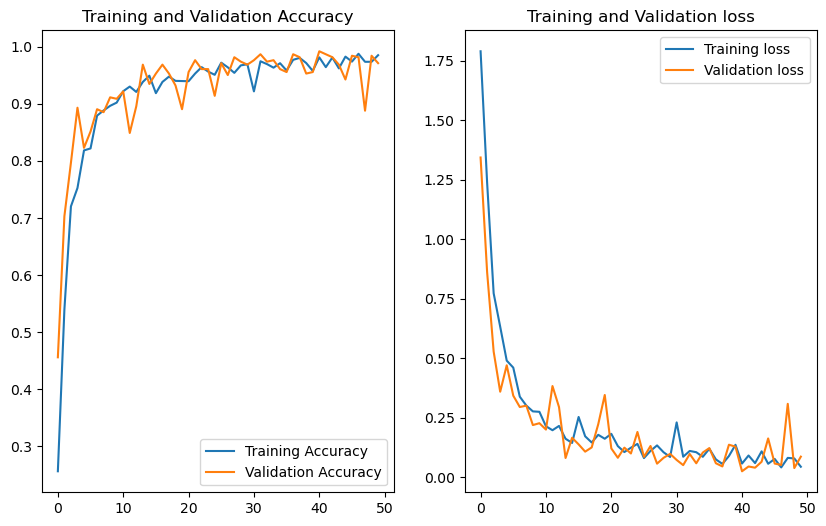

In [22]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCH), acc, label='Training Accuracy')
plt.plot(range(EPOCH), vald_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(range(EPOCH), loss, label='Training loss')
plt.plot(range(EPOCH), vald_loss, label='Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation loss')

1st image to predict
1st image's label: Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step
Predicted Label: Healthy


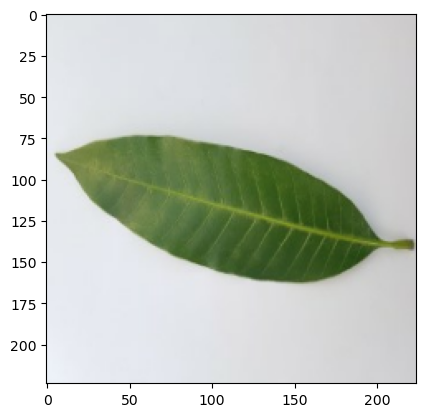

In [23]:
import numpy as np

for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print('1st image to predict')
    plt.imshow(first_image)
    print("1st image's label:", class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("Predicted Label:",class_names[np.argmax(batch_prediction[0])])

In [24]:
def predict(model, img):
    
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    
    predictions = model.predict(img_array)
    
    pred_class = class_names[np.argmax(predictions[0])]
    
    confidence = round(100 * np.max(predictions[0]), 2)
    
    return pred_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


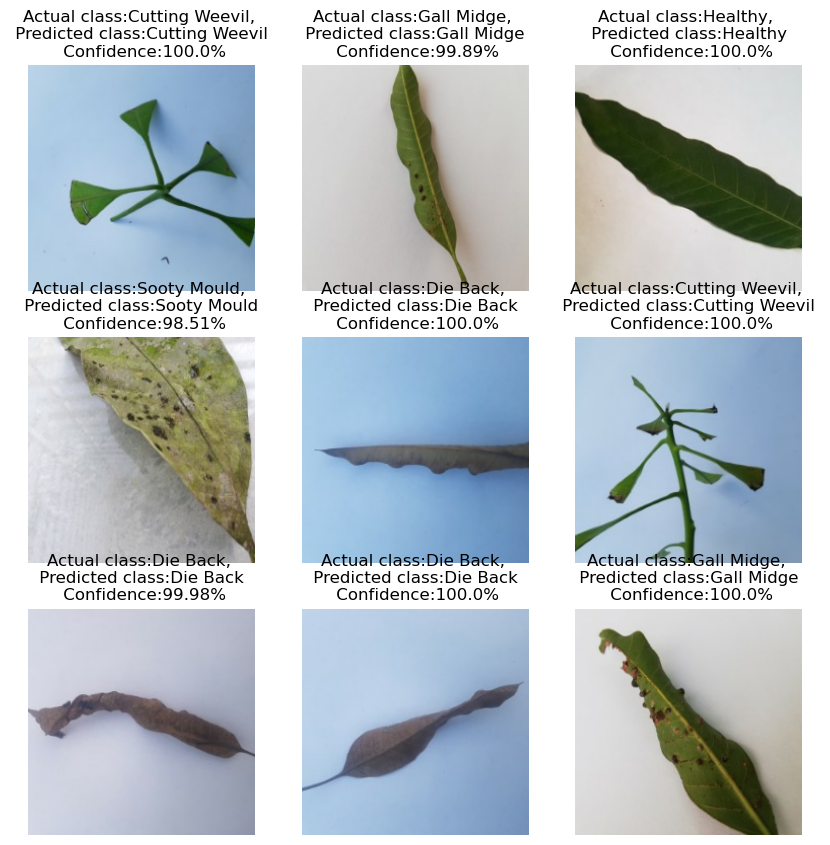

In [25]:
plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class,confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i].numpy()]
        
        plt.title(f"Actual class:{actual_class}, \n Predicted class:{predicted_class} \n Confidence:{confidence}%")
        
        plt.axis('off')

In [26]:
# Save the model in HDF5 format
model.save("GourNet_MangoLeaf_model.keras")

